<a href="https://colab.research.google.com/github/Shivam311201/Beginning-with-AI-ML/blob/master/EDA/IPL_Auction23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
df=pd.read_csv('/content/sample_data/iplauction2023.csv')
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


### Column Types

- **Numerical** - base price, final price
- **Categorical** - Status, player style, nationality, franchise
- **Mixed** - name

## Univariate Analysis

### Player Style

**Conclusions:**

- Large number of bowler and all-rounder registered themselves for auction.


In [3]:
df['player style'].value_counts()

Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: player style, dtype: int64

<Axes: >

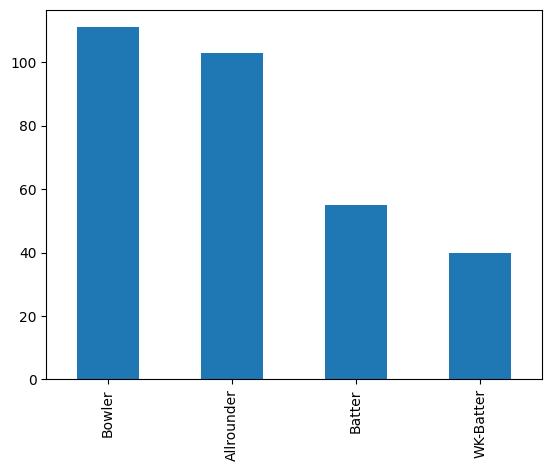

In [5]:
df['player style'].value_counts().plot(kind='bar')

<Axes: ylabel='player style'>

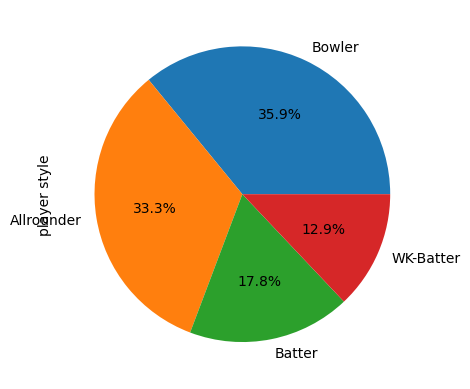

In [7]:
df['player style'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [9]:
df['player style'].isnull().sum()

0

### Nationality

**Conclusions:**

- Majority (65%) of players are Indians.


In [11]:
df['nationality'].value_counts()

India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: nationality, dtype: int64

<Axes: ylabel='nationality'>

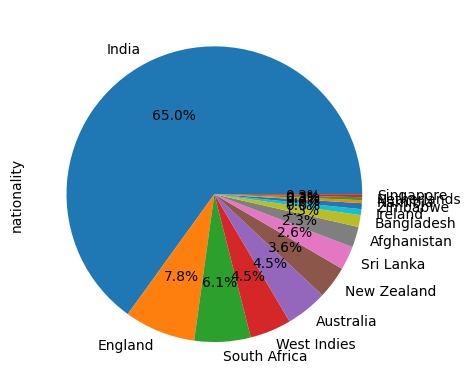

In [12]:
df['nationality'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [13]:
df['nationality'].isnull().sum()

0

### Base Price and Final Price

**conclusions**

- The Base and Final Price is highly(positively) skewed
- Base prices lie in a small range while final prices are scattered more widely.

In [30]:
df['base price (in lacs)'].describe()

count    151.000000
mean      59.205298
std       59.688337
min       20.000000
25%       20.000000
50%       20.000000
75%       75.000000
max      200.000000
Name: base price (in lacs), dtype: float64

In [29]:
df['final price (in lacs)'].describe()

count     238.000000
mean      368.067227
std       449.070117
min        20.000000
25%        21.250000
50%       150.000000
75%       625.000000
max      1850.000000
Name: final price (in lacs), dtype: float64

<Axes: ylabel='Frequency'>

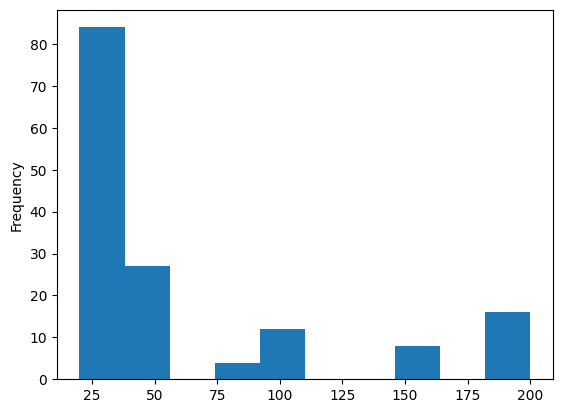

In [17]:
df['base price (in lacs)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

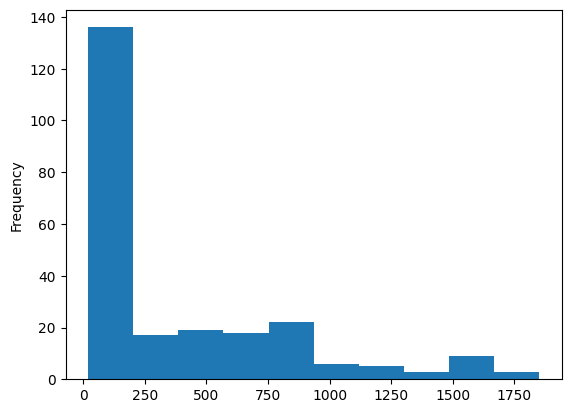

In [31]:
df['final price (in lacs)'].plot(kind='hist')

<Axes: ylabel='Density'>

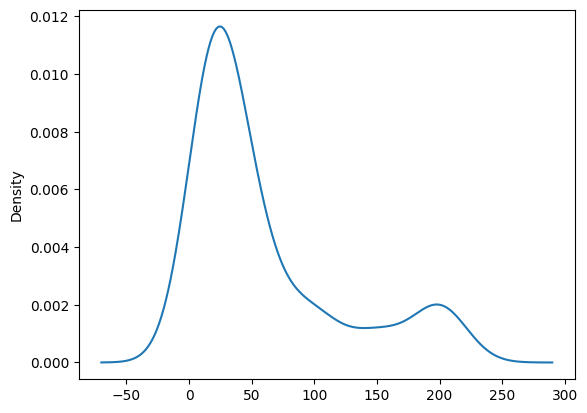

In [18]:
df['base price (in lacs)'].plot(kind='kde')

<Axes: ylabel='Density'>

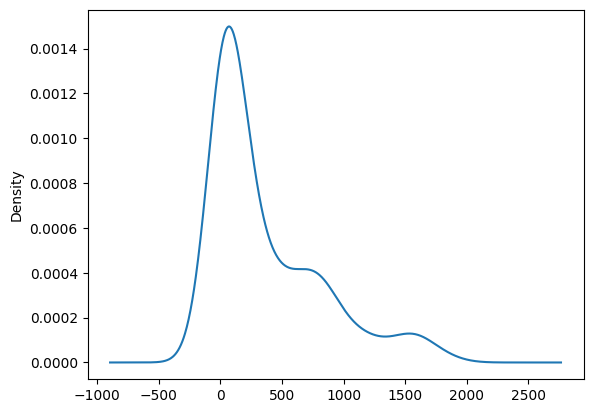

In [32]:
df['final price (in lacs)'].plot(kind='kde')

In [33]:
print(df['base price (in lacs)'].skew())
print(df['final price (in lacs)'].skew())

1.4759428885724521
1.4035924943988667


<Axes: >

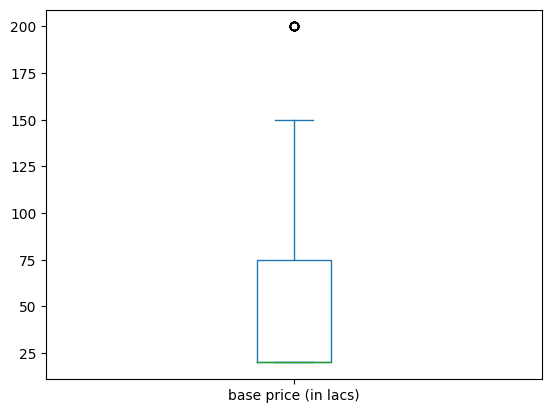

In [20]:
df['base price (in lacs)'].plot(kind='box')

<Axes: >

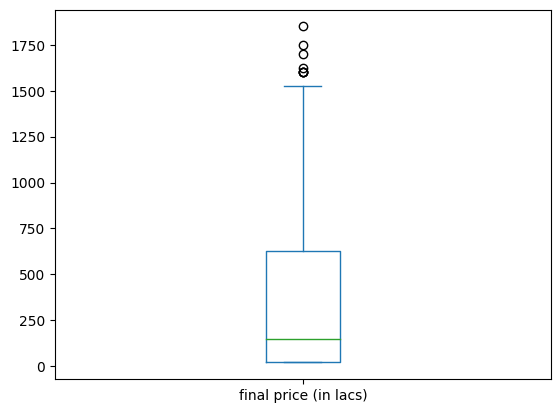

In [34]:
df['final price (in lacs)'].plot(kind='box')

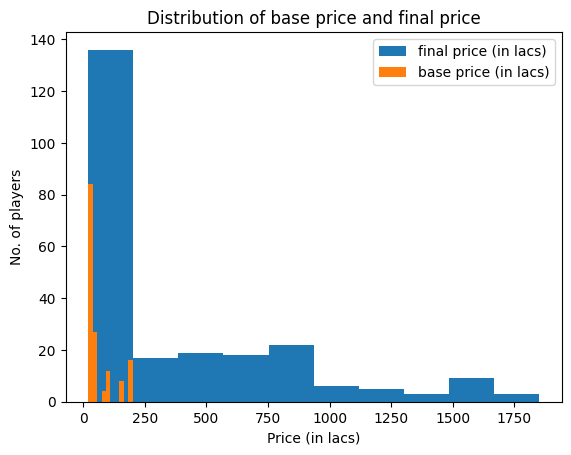

In [3]:
df["final price (in lacs)"].plot(kind = "hist")
df["base price (in lacs)"].plot(kind = "hist")
plt.xlabel("Price (in lacs)")
plt.ylabel("No. of players")
plt.legend()
plt.title("Distribution of base price and final price")
plt.show()

In [25]:
df[(df['status']=='SOLD') | (df['status']=='RETAINED')]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [26]:
df[(df['status']=='SOLD') | (df['status']=='RETAINED')]['final price (in lacs)'].isnull().sum()

0

In [27]:
df[df['status']=='SOLD']['base price (in lacs)'].isnull().sum()

0

## Bivariate Analysis

### Player Style and Status

**Conclusions**

- All type of players have equally likely chance to be sold, unsold or retained, so no direct correlation between player style and Status in percentage terms. However, in absolute terms, bowlers and allrounders are sold and retained in large numbers.

<Axes: xlabel='player style', ylabel='status'>

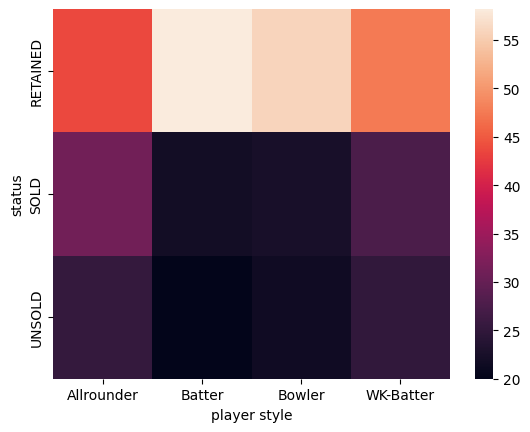

In [13]:
sns.heatmap(pd.crosstab(df['status'],df['player style'],normalize='columns')*100)

In [15]:
pd.crosstab(df['status'],df['player style'])

player style,Allrounder,Batter,Bowler,WK-Batter
status,,,,
RETAINED,45,32,62,19
SOLD,32,12,25,11
UNSOLD,26,11,24,10


In [44]:
pd.crosstab(df['status'],df['player style'],normalize='columns')*100

player style,Allrounder,Batter,Bowler,WK-Batter
status,,,,
RETAINED,43.689320,58.181818,55.855856,47.5
SOLD,31.067961,21.818182,22.522523,27.5
UNSOLD,25.242718,20.000000,21.621622,25.0


In [49]:
df['player style'].value_counts()

Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: player style, dtype: int64

<Axes: xlabel='player style'>

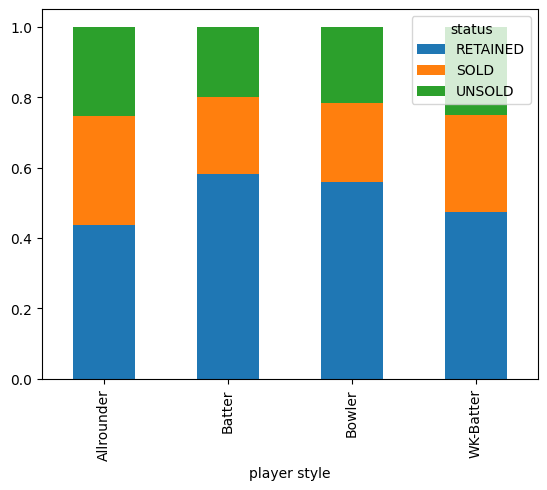

In [14]:
pd.crosstab(df['player style'],df['status'],normalize='index').plot(kind='bar',stacked=True)

In [81]:
df=df[(df['status']=='SOLD') | (df['status']=='RETAINED')]
df

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,extra pay
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED,0.0
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD,0.0
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD,0.0
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD,0.0
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD,0.0
...,...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED,0.0
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED,0.0
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED,0.0
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED,0.0


### Player Style and Final Price

**Conclusions**

- Bowlers have highest demand, followed by allrounders, batter and WK-batter respectively.

#### Dropping UNSOLD players

In [7]:
df_new = df[df["final price (in lacs)"].isna() == False]
df_new.reset_index(inplace = True, drop = "index")

In [8]:
df_new

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
2,Joe Root,Batter,England,100.0,100.0,RR,SOLD
3,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
4,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
...,...,...,...,...,...,...,...
233,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
234,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
235,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
236,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [9]:
df_new.groupby(["nationality"])["final price (in lacs)"].describe()

,count,mean,std,min,25%,50%,75%,max
nationality,,,,,,,,
Afghanistan,4.0,407.500000,728.394353,30.0,45.00,50.0,412.50,1500.0
Australia,11.0,591.818182,528.560653,75.0,150.00,625.0,847.50,1750.0
Bangladesh,3.0,133.333333,76.376262,50.0,100.00,150.0,175.00,200.0
England,15.0,745.666667,558.543599,100.0,200.00,750.0,1075.00,1850.0
India,162.0,323.456790,430.653585,20.0,20.00,62.5,525.00,1700.0
Ireland,1.0,440.000000,NaN,440.0,440.00,440.0,440.00,440.0
Namibia,1.0,100.000000,NaN,100.0,100.00,100.0,100.00,100.0
New Zealand,8.0,221.250000,237.813703,80.0,100.00,150.0,192.50,800.0
Singapore,1.0,825.000000,NaN,825.0,825.00,825.0,825.00,825.0


In [10]:
df_new.groupby(["player style"])["final price (in lacs)"].describe()

,count,mean,std,min,25%,50%,75%,max
player style,,,,,,,,
Allrounder,77.0,376.298701,485.561532,20.0,20.00,100.0,650.00,1850.0
Batter,44.0,425.113636,441.586053,20.0,50.00,260.0,781.25,1600.0
Bowler,87.0,290.344828,350.931313,20.0,30.00,120.0,420.00,1500.0
WK-Batter,30.0,488.666667,581.006756,20.0,31.25,170.0,675.00,1700.0


<Axes: xlabel='player style', ylabel='final price (in lacs)'>

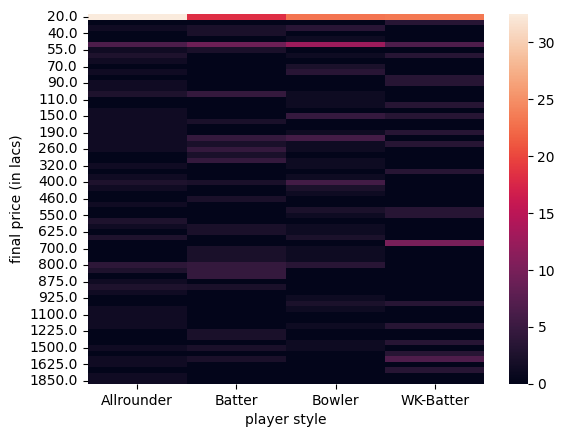

In [16]:
sns.heatmap(pd.crosstab(df['final price (in lacs)'],df['player style'],normalize='columns')*100)

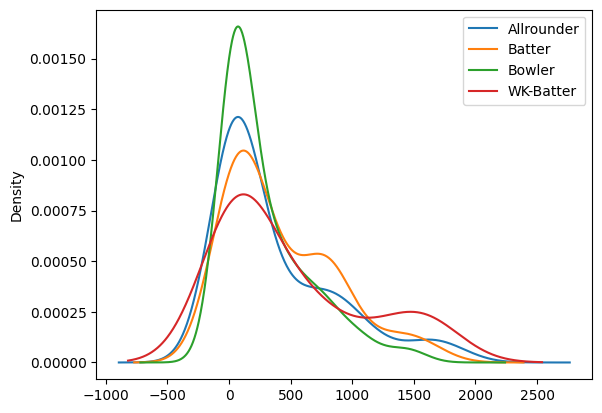

In [17]:
# player style and Final Price

df[df['player style'] == 'Allrounder']['final price (in lacs)'].plot(kind='kde',label='Allrounder')
df[df['player style'] == 'Batter']['final price (in lacs)'].plot(kind='kde',label='Batter')
df[df['player style'] == 'Bowler']['final price (in lacs)'].plot(kind='kde',label='Bowler')
df[df['player style'] == 'WK-Batter']['final price (in lacs)'].plot(kind='kde',label='WK-Batter')

plt.legend()
plt.show()

### Player Style and Franchise

**Conclusions**

- Bowlers have highest demand, followed by allrounders, batter and WK-batter respectively.

In [20]:
ser_fran_count = df_new.groupby(["franchise","player style"])["final price (in lacs)"].count()
ser_fran_count

franchise  player style
CSK        Allrounder      10
           Batter           5
           Bowler           8
           WK-Batter        2
DC         Allrounder       5
           Batter           8
           Bowler          10
           WK-Batter        1
GT         Allrounder       5
           Batter           5
           Bowler          11
           WK-Batter        4
KKR        Allrounder       8
           Batter           3
           Bowler           6
           WK-Batter        2
LSG        Allrounder      12
           Batter           1
           Bowler           9
           WK-Batter        3
MI         Allrounder       8
           Batter           5
           Bowler           7
           WK-Batter        3
PBKS       Allrounder       8
           Batter           4
           Bowler           7
           WK-Batter        3
RCB        Allrounder       8
           Batter           4
           Bowler          10
           WK-Batter        3
RR         Allro

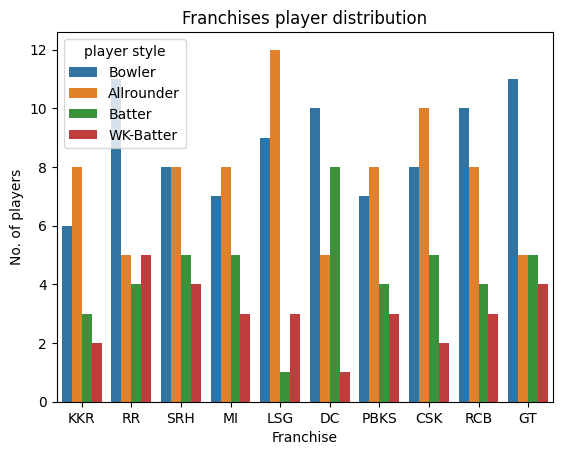

In [22]:
sns.countplot(data = df_new, x = "franchise", hue = "player style")
plt.xlabel("Franchise")
plt.ylabel("No. of players")
plt.title("Franchises player distribution")
plt.show()